In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
import pyspark

Creating Dataframe

In [3]:
data = pd.read_csv("Dataset\Dataset.csv")

data.head(10)


age          Workclass    fnlwgt   Education  Education_Num  \
0  39.0          State-gov   77516.0   Bachelors           13.0   
1  50.0   Self-emp-not-inc   83311.0   Bachelors           13.0   
2  38.0            Private  215646.0     HS-grad            9.0   
3  53.0            Private  234721.0        11th            7.0   
4  28.0            Private  338409.0   Bachelors           13.0   
5  37.0            Private  284582.0     Masters           14.0   
6  49.0            Private  160187.0         9th            5.0   
7  52.0   Self-emp-not-inc  209642.0     HS-grad            9.0   
8  31.0            Private   45781.0     Masters           14.0   
9  42.0            Private  159449.0   Bachelors           13.0   

           Marital_Status          Occupation    Relationship    Race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
5      Married-civ-spouse     Exec-managerial            Wife   White   
6   Married-spouse-absent       Other-service   Not-in-family   Black   
7      Married-civ-spouse     Exec-managerial         Husband   White   
8           Never-married      Prof-specialty   Not-in-family   White   
9      Married-civ-spouse     Exec-managerial         Husband   White   

       Sex  Capital_Gain  Capital_Loss  Hours_per_Week  Native_Country  Income  
0     Male        2174.0           0.0            40.0   United-States   <=50K  
1     Male           0.0           0.0            13.0   United-States   <=50K  
2     Male           0.0           0.0            40.0   United-States   <=50K  
3     Male           0.0           0.0            40.0   United-States   <=50K  
4   Female           0.0           0.0            40.0            Cuba   <=50K  
5   Female           0.0           0.0            40.0   United-States   <=50K  
6   Female           0.0           0.0            16.0         Jamaica   <=50K  
7     Male           0.0           0.0            45.0   United-States    >50K  
8   Female       14084.0           0.0            50.0   United-States    >50K  
9     Male        5178.0           0.0            40.0   United-States    >50K

Set names to colums

In [4]:
# Manually set column names
column_names = ['age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_Week', 'Native_Country', 'Income']

# Assign column names to the DataFrame
data.columns = column_names

# Display the updated DataFrame
data.head(10)


age          Workclass    fnlwgt   Education  Education_Num  \
0  39.0          State-gov   77516.0   Bachelors           13.0   
1  50.0   Self-emp-not-inc   83311.0   Bachelors           13.0   
2  38.0            Private  215646.0     HS-grad            9.0   
3  53.0            Private  234721.0        11th            7.0   
4  28.0            Private  338409.0   Bachelors           13.0   
5  37.0            Private  284582.0     Masters           14.0   
6  49.0            Private  160187.0         9th            5.0   
7  52.0   Self-emp-not-inc  209642.0     HS-grad            9.0   
8  31.0            Private   45781.0     Masters           14.0   
9  42.0            Private  159449.0   Bachelors           13.0   

           Marital_Status          Occupation    Relationship    Race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
5      Married-civ-spouse     Exec-managerial            Wife   White   
6   Married-spouse-absent       Other-service   Not-in-family   Black   
7      Married-civ-spouse     Exec-managerial         Husband   White   
8           Never-married      Prof-specialty   Not-in-family   White   
9      Married-civ-spouse     Exec-managerial         Husband   White   

       Sex  Capital_Gain  Capital_Loss  Hours_per_Week  Native_Country  Income  
0     Male        2174.0           0.0            40.0   United-States   <=50K  
1     Male           0.0           0.0            13.0   United-States   <=50K  
2     Male           0.0           0.0            40.0   United-States   <=50K  
3     Male           0.0           0.0            40.0   United-States   <=50K  
4   Female           0.0           0.0            40.0            Cuba   <=50K  
5   Female           0.0           0.0            40.0   United-States   <=50K  
6   Female           0.0           0.0            16.0         Jamaica   <=50K  
7     Male           0.0           0.0            45.0   United-States    >50K  
8   Female       14084.0           0.0            50.0   United-States    >50K  
9     Male        5178.0           0.0            40.0   United-States    >50K

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  float64
 1   Workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   Education       48842 non-null  object 
 4   Education_Num   48842 non-null  float64
 5   Marital_Status  48842 non-null  object 
 6   Occupation      48842 non-null  object 
 7   Relationship    48842 non-null  object 
 8   Race            48842 non-null  object 
 9   Sex             48842 non-null  object 
 10  Capital_Gain    48842 non-null  float64
 11  Capital_Loss    48842 non-null  float64
 12  Hours_per_Week  48842 non-null  float64
 13  Native_Country  48842 non-null  object 
 14  Income          48842 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.6+ MB


In [6]:
data.describe()

age        fnlwgt  Education_Num  Capital_Gain  Capital_Loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       Hours_per_Week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [7]:
data

age          Workclass    fnlwgt   Education  Education_Num  \
0      39.0          State-gov   77516.0   Bachelors           13.0   
1      50.0   Self-emp-not-inc   83311.0   Bachelors           13.0   
2      38.0            Private  215646.0     HS-grad            9.0   
3      53.0            Private  234721.0        11th            7.0   
4      28.0            Private  338409.0   Bachelors           13.0   
...     ...                ...       ...         ...            ...   
48838  64.0                  ?  321403.0     HS-grad            9.0   
48839  38.0            Private  374983.0   Bachelors           13.0   
48840  44.0            Private   83891.0   Bachelors           13.0   
48841  35.0       Self-emp-inc  182148.0   Bachelors           13.0   
48842   NaN                NaN       NaN         NaN            NaN   

            Marital_Status          Occupation     Relationship  \
0            Never-married        Adm-clerical    Not-in-family   
1       Married-civ-spouse     Exec-managerial          Husband   
2                 Divorced   Handlers-cleaners    Not-in-family   
3       Married-civ-spouse   Handlers-cleaners          Husband   
4       Married-civ-spouse      Prof-specialty             Wife   
...                    ...                 ...              ...   
48838              Widowed                   ?   Other-relative   
48839   Married-civ-spouse      Prof-specialty          Husband   
48840             Divorced        Adm-clerical        Own-child   
48841   Married-civ-spouse     Exec-managerial          Husband   
48842                  NaN                 NaN              NaN   

                      Race      Sex  Capital_Gain  Capital_Loss  \
0                    White     Male        2174.0           0.0   
1                    White     Male           0.0           0.0   
2                    White     Male           0.0           0.0   
3                    Black     Male           0.0           0.0   
4                    Black   Female           0.0           0.0   
...                    ...      ...           ...           ...   
48838                Black     Male           0.0           0.0   
48839                White     Male           0.0           0.0   
48840   Asian-Pac-Islander     Male        5455.0           0.0   
48841                White     Male           0.0           0.0   
48842                  NaN      NaN           NaN           NaN   

       Hours_per_Week  Native_Country   Income  
0                40.0   United-States    <=50K  
1                13.0   United-States    <=50K  
2                40.0   United-States    <=50K  
3                40.0   United-States    <=50K  
4                40.0            Cuba    <=50K  
...               ...             ...      ...  
48838            40.0   United-States   <=50K.  
48839            50.0   United-States   <=50K.  
48840            40.0   United-States   <=50K.  
48841            60.0   United-States    >50K.  
48842             NaN             NaN      NaN  

[48843 rows x 15 columns]

pip install data_exploration

Discrete Variable Barplot

In [9]:
print(data.head())

    age          Workclass    fnlwgt   Education  Education_Num  \
0  39.0          State-gov   77516.0   Bachelors           13.0   
1  50.0   Self-emp-not-inc   83311.0   Bachelors           13.0   
2  38.0            Private  215646.0     HS-grad            9.0   
3  53.0            Private  234721.0        11th            7.0   
4  28.0            Private  338409.0   Bachelors           13.0   

        Marital_Status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital_Gain  Capital_Loss  Hours_per_Week  Native_Country  Income  
0        2174.0           0.0            40.0   Un

In [10]:
filtered_data = data[data['Workclass'].str.strip() == '']
# Print the filtered rows
print(filtered_data)
#data.filter(data['Workclass'] == 'Private').show()

Empty DataFrame
Columns: [age, Workclass, fnlwgt, Education, Education_Num, Marital_Status, Occupation, Relationship, Race, Sex, Capital_Gain, Capital_Loss, Hours_per_Week, Native_Country, Income]
Index: []


In [11]:
# Check for missing values in the dataset
missing_data = data.isnull().sum().reset_index()
missing_data.columns = ['Feature', 'Missing Values']

# Display missing data as a table
print(missing_data)

           Feature  Missing Values
0              age               1
1        Workclass               1
2           fnlwgt               1
3        Education               1
4    Education_Num               1
5   Marital_Status               1
6       Occupation               1
7     Relationship               1
8             Race               1
9              Sex               1
10    Capital_Gain               1
11    Capital_Loss               1
12  Hours_per_Week               1
13  Native_Country               1
14          Income               1


In [12]:
pd.Series(data.fnlwgt.unique()).sort_values()

13258      12285.0
28440      13492.0
19003      13769.0
26085      13862.0
18219      14878.0
           ...    
13044    1366120.0
13898    1455435.0
11597    1484705.0
25230    1490400.0
28523          NaN
Length: 28524, dtype: float64

In [13]:
pd.Series(data.Capital_Gain.unique()).sort_values()

1          0.0
80       114.0
61       401.0
19       594.0
60       914.0
        ...   
48     27828.0
9      34095.0
90     41310.0
38     99999.0
123        NaN
Length: 124, dtype: float64

In [14]:
print(data.shape)

(48843, 15)


In [15]:
# Function to remove outliers based on IQR
Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
    
    # Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print("lower_bound ",lower_bound)
print("upper_bound ",upper_bound)


    # Remove outliers
  #  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
  #  return df_no_outliers

# Specify the columns for which you want to remove outliers
#columns_to_remove_outliers = ['fnlwgt']

# Apply the remove_outliers function to each specified column
#for column in columns_to_remove_outliers:
 #   df = remove_outliers(df, column)

# The DataFrame df now contains the data with outliers removed

Q1  117550.5
Q3  237642.0
IQR  120091.5
lower_bound  -62586.75
upper_bound  417779.25


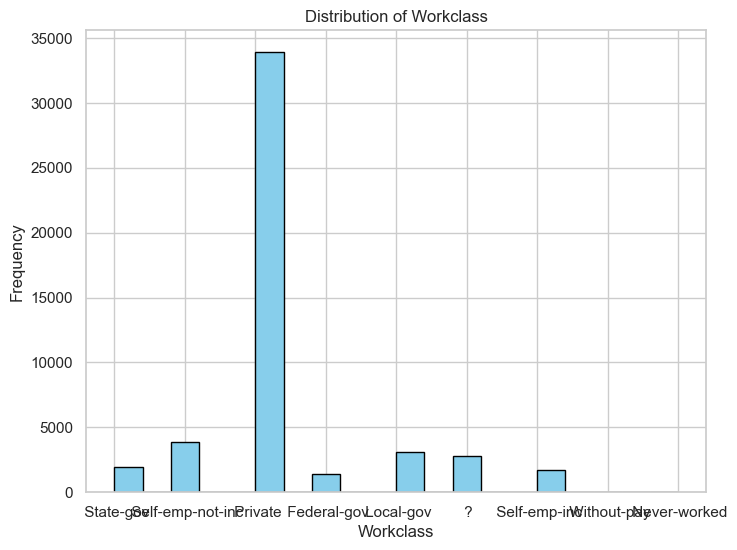

In [16]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'column_name' is the column you want to visualize
column_name = 'Workclass'  # You can change this to the column you want to visualize

# Plotting histogram
plt.figure(figsize=(8, 6))
plt.hist(data[column_name].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [17]:
#'age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_Week', 'Native_Country', 'Income'

In [18]:
data['age'].value_counts()

age
36.0    1348
35.0    1337
33.0    1335
23.0    1329
31.0    1325
        ... 
88.0       6
85.0       5
87.0       3
89.0       2
86.0       1
Name: count, Length: 74, dtype: int64

In [19]:
data['Workclass'].value_counts()

Workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [20]:
# Step 1: Replace "?" with NaN
data['Workclass'].replace(' ?', np.nan, inplace=True)

# Step 2: Calculate the mode of the "Workclass" column (most common category)
mode_workclass = data['Workclass'].mode()[0]

# Step 3: Replace missing values with the mode
data['Workclass'].fillna(mode_workclass, inplace=True)

# Now, the "?" values in the "Workclass" column are replaced with the mode

In [21]:
data['Workclass'].value_counts()

Workclass
Private             36706
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [22]:
# Remove rows where "?" is located in both "Workclass" and "Occupation" columns
data = data[(data['Workclass'] != ' ?') & (data['Occupation'] != ' ?')]

# Now, all rows with "?" in both "Workclass" and "Occupation" columns are removed


In [23]:
data['Education'].value_counts()

Education
HS-grad         14972
Some-college    10036
Bachelors        7772
Masters          2590
Assoc-voc        1978
11th             1631
Assoc-acdm       1529
10th             1239
7th-8th           844
Prof-school       810
9th               687
12th              599
Doctorate         576
5th-6th           468
1st-4th           229
Preschool          73
Name: count, dtype: int64

In [24]:
data['Marital_Status'].value_counts()

Marital_Status
Married-civ-spouse       21451
Never-married            14875
Divorced                  6363
Separated                 1433
Widowed                   1296
Married-spouse-absent      583
Married-AF-spouse           32
Name: count, dtype: int64

In [25]:
data['Occupation'].value_counts()

Occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [26]:
data['Relationship'].value_counts()

Relationship
Husband           19005
Not-in-family     11916
Own-child          6706
Unmarried          4867
Wife               2139
Other-relative     1400
Name: count, dtype: int64

In [27]:
data['Race'].value_counts()

Race
White                 39444
Black                  4356
Asian-Pac-Islander     1423
Amer-Indian-Eskimo      435
Other                   375
Name: count, dtype: int64

In [28]:
data['Native_Country'].value_counts()

Native_Country
United-States                 41292
Mexico                          903
?                               811
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru         

In [29]:
data['Sex'].value_counts()

Sex
Male      31114
Female    14919
Name: count, dtype: int64

In [30]:
data['Income'].value_counts()

Income
<=50K     23068
<=50K.    11543
>50K       7650
>50K.      3772
Name: count, dtype: int64

In [31]:
data['Income'] = data['Income'].str.replace(".", "")

C:\Users\Dell\AppData\Local\Temp\ipykernel_15736\1593902080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Income'] = data['Income'].str.replace(".", "")


In [32]:
data['Income'].value_counts()

Income
<=50K    34611
>50K     11422
Name: count, dtype: int64

In [33]:
data.head()

age          Workclass    fnlwgt   Education  Education_Num  \
0  39.0          State-gov   77516.0   Bachelors           13.0   
1  50.0   Self-emp-not-inc   83311.0   Bachelors           13.0   
2  38.0            Private  215646.0     HS-grad            9.0   
3  53.0            Private  234721.0        11th            7.0   
4  28.0            Private  338409.0   Bachelors           13.0   

        Marital_Status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital_Gain  Capital_Loss  Hours_per_Week  Native_Country  Income  
0        2174.0           0.0            40.0   United-States   <=50K  
1           0.0           0.0            13.0   United-States   <=50K  
2           0.0           0.0            40.0   United-States   <=50K  
3           0.0           0.0            40.0   United-States   <=50K  
4           0.0           0.0            40.0            Cuba   <=50K

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [36]:
#data['le_age']=le.fit_transform(data['age'])
data['le_workclass']=le.fit_transform(data['Workclass'])
#data['le_fnlwgt']=le.fit_transform(data['fnlwgt'])
data['le_education']=le.fit_transform(data['Education'])
#data['le_edu_num']=le.fit_transform(data['Education_Num'])
data['le_marital_status']=le.fit_transform(data['Marital_Status'])
data['le_occupation']=le.fit_transform(data['Occupation'])
data['le_relationship']=le.fit_transform(data['Relationship'])
data['le_race']=le.fit_transform(data['Race'])
data['le_sex']=le.fit_transform(data['Sex'])
#data['le_capital_gain']=le.fit_transform(data['Capital_Gain'])
#data['le_capital_loss']=le.fit_transform(data['Capital_Loss'])
#data['le_working_hours']=le.fit_transform(data['Hours_per_Week'])
data['le_country']=le.fit_transform(data['Native_Country'])
data['le_income']=le.fit_transform(data['Income'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_15736\2510231773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['le_workclass']=le.fit_transform(data['Workclass'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_15736\2510231773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['le_education']=le.fit_transform(data['Education'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_15736\2510231773.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [37]:
data.describe()

age        fnlwgt  Education_Num  Capital_Gain  Capital_Loss  \
count  46033.000000  4.603300e+04   46033.000000  46033.000000  46033.000000   
mean      38.556601  1.898051e+05      10.128929   1114.332653     88.729346   
std       13.204268  1.054747e+05       2.564064   7589.571484    405.316932   
min       17.000000  1.349200e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176060e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783530e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.378650e+05      13.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       Hours_per_Week  le_workclass  le_education  le_marital_status  \
count    46033.000000  46034.000000  46034.000000       46034.000000   
mean        40.948407      2.205196     10.309380           2.587892   
std         12.011069      0.957845      3.813454           1.498121   
min          1.000000      0.000000      0.000000           0.000000   
25%         40.000000      2.000000      9.000000           2.000000   
50%         40.000000      2.000000     11.000000           2.000000   
75%         45.000000      2.000000     12.000000           4.000000   
max         99.000000      6.000000     16.000000           7.000000   

       le_occupation  le_relationship       le_race        le_sex  \
count   46034.000000     46034.000000  46034.000000  46034.000000   
mean        5.979254         1.412065      3.672090      0.675935   
std         4.023564         1.597419      0.841761      0.468076   
min         0.000000         0.000000      0.000000      0.000000   
25%         2.000000         0.000000      4.000000      0.000000   
50%         6.000000         1.000000      4.000000      1.000000   
75%         9.000000         3.000000      4.000000      1.000000   
max        14.000000         6.000000      5.000000      2.000000   

         le_country     le_income  
count  46034.000000  46034.000000  
mean      36.742212      0.248164  
std        7.779682      0.432003  
min        0.000000      0.000000  
25%       39.000000      0.000000  
50%       39.000000      0.000000  
75%       39.000000      0.000000  
max       42.000000      2.000000

In [38]:
new=["age","fnlwgt","Education_Num","Capital_Gain","Capital_Loss","Hours_per_Week","le_workclass","le_education","le_marital_status","le_occupation","le_relationship","le_race","le_sex","le_country","le_income"]
data2=data[new]
data2

age    fnlwgt  Education_Num  Capital_Gain  Capital_Loss  \
0      39.0   77516.0           13.0        2174.0           0.0   
1      50.0   83311.0           13.0           0.0           0.0   
2      38.0  215646.0            9.0           0.0           0.0   
3      53.0  234721.0            7.0           0.0           0.0   
4      28.0  338409.0           13.0           0.0           0.0   
...     ...       ...            ...           ...           ...   
48837  39.0  215419.0           13.0           0.0           0.0   
48839  38.0  374983.0           13.0           0.0           0.0   
48840  44.0   83891.0           13.0        5455.0           0.0   
48841  35.0  182148.0           13.0           0.0           0.0   
48842   NaN       NaN            NaN           NaN           NaN   

       Hours_per_Week  le_workclass  le_education  le_marital_status  \
0                40.0             5             9                  4   
1                13.0             4             9                  2   
2                40.0             2            11                  0   
3                40.0             2             1                  2   
4                40.0             2             9                  2   
...               ...           ...           ...                ...   
48837            36.0             2             9                  0   
48839            50.0             2             9                  2   
48840            40.0             2             9                  0   
48841            60.0             3             9                  2   
48842             NaN             2            16                  7   

       le_occupation  le_relationship  le_race  le_sex  le_country  le_income  
0                  0                1        4       1          39          0  
1                  3                0        4       1          39          0  
2                  5                1        4       1          39          0  
3                  5                0        2       1          39          0  
4                  9                5        2       0           5          0  
...              ...              ...      ...     ...         ...        ...  
48837              9                1        4       0          39          0  
48839              9                0        4       1          39          0  
48840              0                3        1       1          39          0  
48841              3                0        4       1          39          1  
48842             14                6        5       2          42          2  

[46034 rows x 15 columns]

In [39]:
correlation_matrix = data2.corr()
print(correlation_matrix)

                        age    fnlwgt  Education_Num  Capital_Gain  \
age                1.000000 -0.075757       0.037566      0.079907   
fnlwgt            -0.075757  1.000000      -0.040167     -0.004246   
Education_Num      0.037566 -0.040167       1.000000      0.126382   
Capital_Gain       0.079907 -0.004246       0.126382      1.000000   
Capital_Loss       0.059441 -0.004363       0.081463     -0.032142   
Hours_per_Week     0.102185 -0.018325       0.145151      0.082977   
le_workclass       0.085414 -0.034437       0.041919      0.033801   
le_education      -0.004881 -0.024517       0.347521      0.029209   
le_marital_status -0.271917  0.032372      -0.064667     -0.042961   
le_occupation     -0.005091 -0.001358       0.091189      0.018408   
le_relationship   -0.246611  0.008249      -0.089292     -0.056191   
le_race            0.025596 -0.028842       0.028025      0.011685   
le_sex             0.081671  0.028567       0.005204      0.047037   
le_country        -0

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46034 entries, 0 to 48842
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                46033 non-null  float64
 1   Workclass          46034 non-null  object 
 2   fnlwgt             46033 non-null  float64
 3   Education          46033 non-null  object 
 4   Education_Num      46033 non-null  float64
 5   Marital_Status     46033 non-null  object 
 6   Occupation         46033 non-null  object 
 7   Relationship       46033 non-null  object 
 8   Race               46033 non-null  object 
 9   Sex                46033 non-null  object 
 10  Capital_Gain       46033 non-null  float64
 11  Capital_Loss       46033 non-null  float64
 12  Hours_per_Week     46033 non-null  float64
 13  Native_Country     46033 non-null  object 
 14  Income             46033 non-null  object 
 15  le_workclass       46034 non-null  int32  
 16  le_education       46034 no

In [41]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46034 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                46033 non-null  float64
 1   fnlwgt             46033 non-null  float64
 2   Education_Num      46033 non-null  float64
 3   Capital_Gain       46033 non-null  float64
 4   Capital_Loss       46033 non-null  float64
 5   Hours_per_Week     46033 non-null  float64
 6   le_workclass       46034 non-null  int32  
 7   le_education       46034 non-null  int32  
 8   le_marital_status  46034 non-null  int32  
 9   le_occupation      46034 non-null  int32  
 10  le_relationship    46034 non-null  int32  
 11  le_race            46034 non-null  int32  
 12  le_sex             46034 non-null  int32  
 13  le_country         46034 non-null  int32  
 14  le_income          46034 non-null  int32  
dtypes: float64(6), int32(9)
memory usage: 4.0 MB


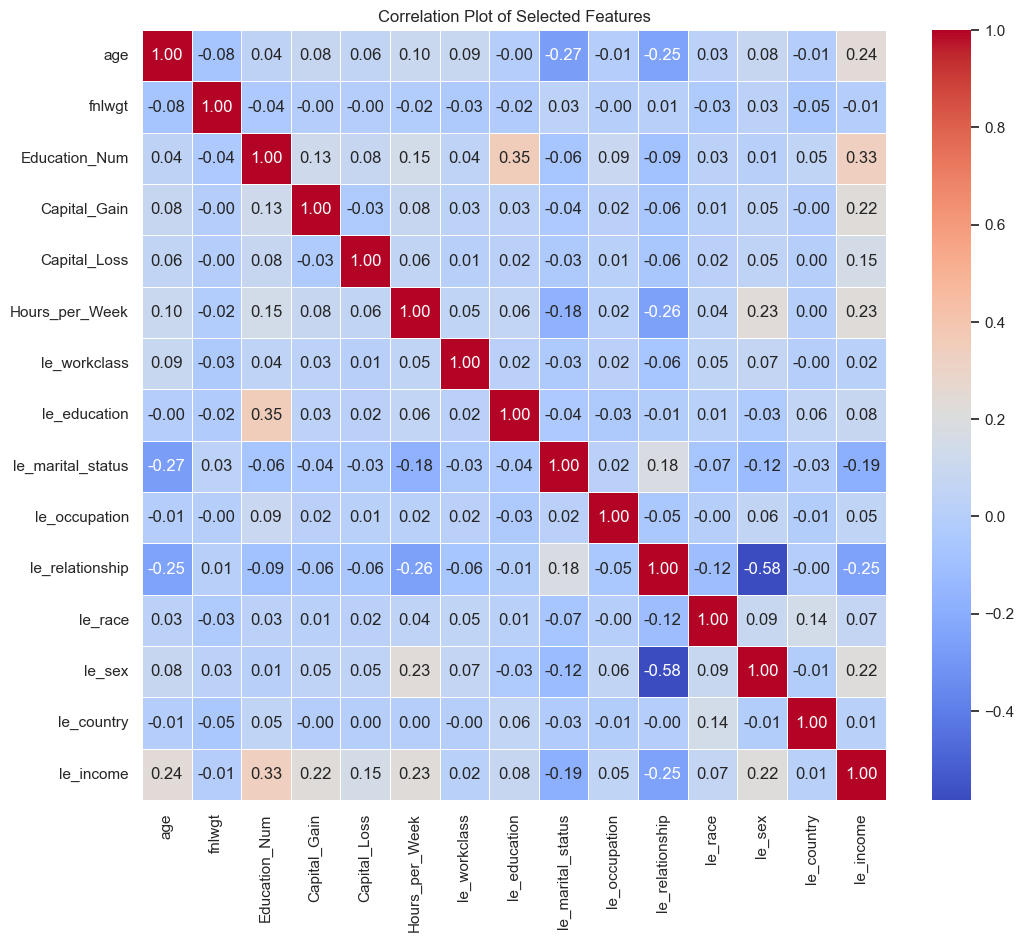

In [42]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Plot of Selected Features')
plt.show()

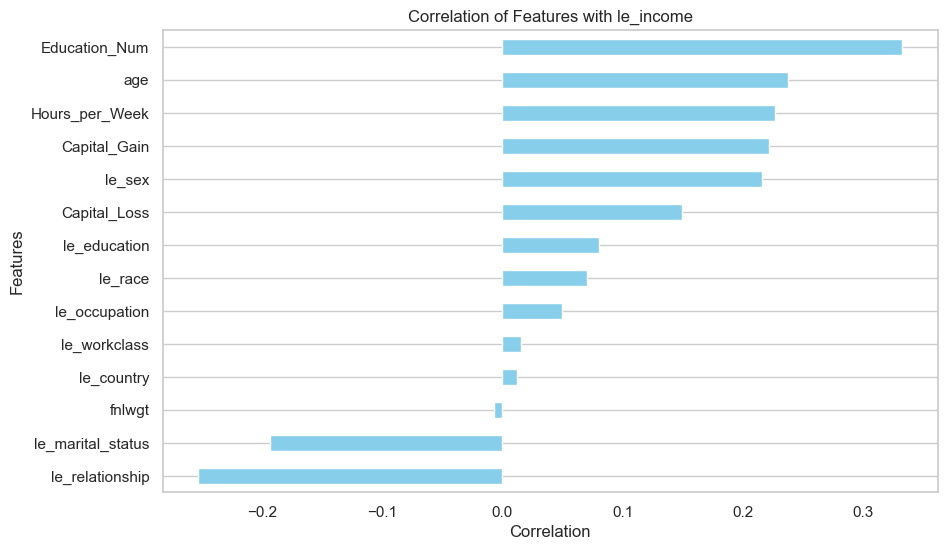

In [43]:
# Calculate correlation matrix
correlation_matrix = data2.corr()

# Extract correlation of le_income with other features
income_correlation = correlation_matrix['le_income'].drop('le_income')

# Plot
plt.figure(figsize=(10, 6))
income_correlation.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation of Features with le_income')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()


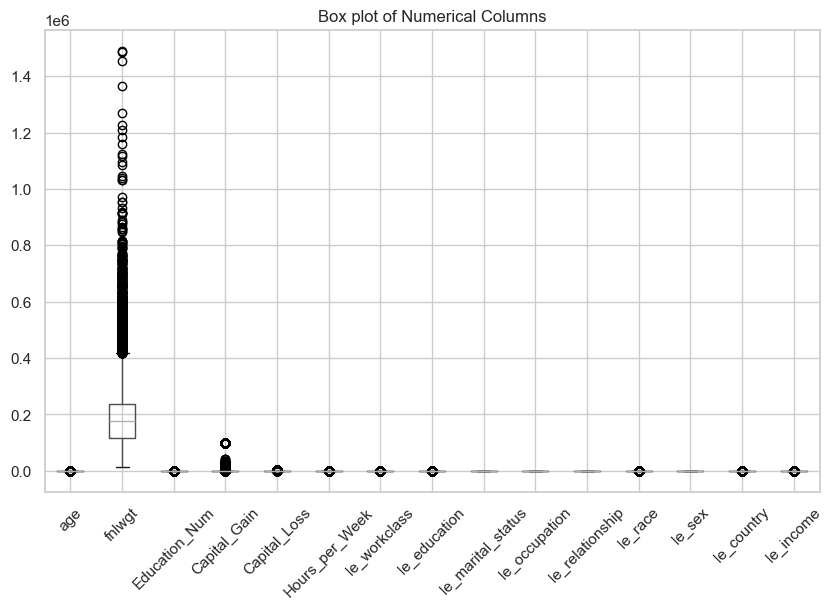

In [44]:
# Select numerical columns from the DataFrame
numerical_columns = data2.select_dtypes(include=['int', 'float']).columns

# Create box plots for each numerical column to visualize outliers
plt.figure(figsize=(10, 6))
data[numerical_columns].boxplot()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Box plot of Numerical Columns')
plt.show()


In [45]:

# Assuming your DataFrame is named 'data'
# Replace 'your_filename.csv' with the desired filename
data2.to_csv('preprocessed.csv', index=False)

# index=False prevents Pandas from writing row indices to the CSV file
